In [1]:
from lblcrn.crn_sym import *
from lblcrn.experiments.simulate import simulate
from lblcrn.experiments.xps_io import read_exp

In [2]:
sm = SpeciesManager()

y1 = sm.sp('H2Og', Orbital('1s', 535.0))
x2 = sm.sp('H2O*', Orbital('1s', 532.2))
x3 = sm.sp('OH*', Orbital('1s', 530.9))
x4 = sm.sp('O*', Orbital('1s', 530.0))
x53 = sm.sp('OH.H2O_hb', Orbital('1s', 531.6))
x54 = sm.sp('O.H2O_hb', Orbital('1s', 531.6))
x6 = sm.sp('multiH2O', Orbital('1s', 533.2))
x7 = sm.sp('O2g', Orbital('1s', 535.0))

rsys = RxnSystem(
    Rxn(x4 + y1, x54, 3.207654),
    Rxn(x3 + y1, x53, 1.363342),
    RevRxn(x54, x3 + x3, 6.220646,0.160755),
    Rxn(x53, x2 + x3, 0.299507),
    Rxn(x54, x2 + x4, 0.167130),
    Rxn(x2, y1, 1.939313),
    Rxn(y1, x2, 0.515646),
    Rxn(x53, y1 + x3, 0.733491),
    Rxn(x54, x4 + y1, 0.311754),
    Rxn(x53 + y1, x6, 1.038423),
    Rxn(x6, x53 + y1, 0.962999),
    RevRxn(x4 + x4, x7, 0.002342,426.922895),
    Conc(y1,1),
    Conc(x4,0.25),
    sm
)

In [3]:
xps, ts = simulate(rsys, 500, max_step=1, ignore=[y1])

[Orbital(name='1s', binding_energy=532.2)]
[Orbital(name='1s', binding_energy=530.0)]
[Orbital(name='1s', binding_energy=531.6)]
[Orbital(name='1s', binding_energy=535.0)]
[Orbital(name='1s', binding_energy=530.9)]
[Orbital(name='1s', binding_energy=531.6)]
[Orbital(name='1s', binding_energy=533.2)]


[Orbital(name='1s', binding_energy=532.2)]
[Orbital(name='1s', binding_energy=530.0)]
[Orbital(name='1s', binding_energy=531.6)]
[Orbital(name='1s', binding_energy=535.0)]
[Orbital(name='1s', binding_energy=530.9)]
[Orbital(name='1s', binding_energy=531.6)]
[Orbital(name='1s', binding_energy=533.2)]


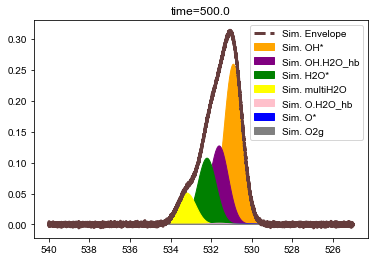

In [4]:
xps.plot(augment=True)